In [29]:
import pandas as pd


METRIC_SET_MAPPING = {
    "none": "NONE",
    "all-non-null-numeric": "ALL",
    "pydriller": "PyD",
    "product": "PD",
    "process": "PR",
    "javametrics-numeric": "JM",
    "javametrics2": "JM2",
    "javametrics2-process": "JM2R",
    "javametrics2-product": "JM2D",
    "pmd": "PMD",
    "minimal-good": "MG",
    "best-mcc": "BC",
    "best-precision": "BP"
}

MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB",
    "unscaled-XGB": "XGB",
    "unscaled-LGBM": "LBGM",
    "unscaled-catboost-05": "CB",
}


partial_results = [
    "../../data/experiment1-final/r_1.csv",
    "../../data/experiment1-final/r_2.csv",
    "../../data/experiment1-final/r_3.csv",
    "../../data/experiment1-final/r_4.csv",
    "../../data/experiment1-final/r_5.csv",
    "../../data/experiment1-final/r_6.csv",
    "../../data/experiment1-final/r_7.csv",
    "../../data/experiment1-final/r_8.csv",
    "../../data/experiment1-final/r_9.csv",
    "../../data/experiment1-final/r_10.csv",
    "../../data/experiment1-final/r_11.csv",
    "../../data/experiment1-final/r_12.csv",
    "../../data/experiment1-final/r_13-gb.csv",
    "../../data/experiment1-final/r_14-cb_12.csv"
]

results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in partial_results])

description = results.groupby(["model_type", "metric_set", "smell_models"]).describe()

description = results.filter(["model_type", "metric_set", "smell_models", "real_mcc", "real_precision"]).groupby(["model_type", "smell_models", "metric_set"]).describe()
description

real_mcc            \
                                                           count      mean   
model_type            smell_models metric_set                                
basic-adaboost        False        all-non-null-numeric     12.0  0.452991   
                                   javametrics-numeric      12.0  0.260791   
                                   javametrics2             12.0  0.308513   
                                   javametrics2-process     12.0  0.304139   
                                   javametrics2-product     12.0  0.253700   
...                                                          ...       ...   
unscaled-randomforest True         none                     12.0  0.224693   
                                   pmd                      12.0  0.333742   
                                   process                   8.0  0.525524   
                                   product                  12.0  0.348547   
                                   pydriller                12.0  0.485380   

                                                                             \
                                                              std       min   
model_type            smell_models metric_set                                 
basic-adaboost        False        all-non-null-numeric  0.004838  0.446486   
                                   javametrics-numeric   0.008125  0.249027   
                                   javametrics2          0.006803  0.296663   
                                   javametrics2-process  0.038949  0.189873   
                                   javametrics2-product  0.004719  0.246321   
...                                                           ...       ...   
unscaled-randomforest True         none                  0.004287  0.218772   
                                   pmd                   0.006567  0.324657   
                                   process               0.007984  0.513415   
                                   product               0.005254  0.338305   
                                   pydriller             0.007421  0.472943   

                                                                             \
                                                              25%       50%   
model_type            smell_models metric_set                                 
basic-adaboost        False        all-non-null-numeric  0.448368  0.453821   
                                   javametrics-numeric   0.256202  0.259336   
                                   javametrics2          0.303776  0.308001   
                                   javametrics2-process  0.303228  0.308443   
                                   javametrics2-product  0.250804  0.252849   
...                                                           ...       ...   
unscaled-randomforest True         none                  0.220510  0.225874   
                                   pmd                   0.328891  0.333008   
                                   process               0.521832  0.526861   
                                   product               0.346268  0.348100   
                                   pydriller             0.480115  0.485638   

                                                                             \
                                                              75%       max   
model_type            smell_models metric_set                                 
basic-adaboost        False        all-non-null-numeric  0.454994  0.461382   
                                   javametrics-numeric   0.262044  0.281391   
                                   javametrics2          0.312224  0.318928   
                                   javametrics2-process  0.318487  0.352639   
                                   javametrics2-product  0.256688  0.264263   
...                                                           ...       ...   
unscaled-randomforest True         non

In [30]:
series = description.filter([("real_mcc", "50%"), ("real_precision", "50%")]).reset_index()
series["MCC"] = series[("real_mcc", "50%")]
series["Precision"] = series[("real_precision", "50%")]
series = series.drop(columns=[("real_mcc", "50%"), ("real_precision", "50%")])
series["metric_set"] = series["metric_set"].map(METRIC_SET_MAPPING)
series["model_type"] = series["model_type"].map(MODEL_NAME_MAPPING)

incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])

final_series = incl_smells.merge(excl_smells, on=("model_type", "metric_set"), suffixes=(" (smells)", " (no smells)"))

final_series = final_series[["model_type", "metric_set", "MCC (smells)", "MCC (no smells)", "Precision (smells)", "Precision (no smells)"]]
final_series = final_series.rename(columns={"model_type": "Model", "metric_set": "Metric set"})

final_series = final_series.sort_values(by=['MCC (no smells)'], ascending=False)

final_series = final_series.reset_index(drop=True)
final_series.index += 1
final_series.style.to_latex(
    buf="performance-metrics-basic.tex",
    caption="Prediction performance measures for multi-metric scenario",
    label="Appendix:DataTableBasic",
    environment = "longtable"
)

final_series

C:\Users\Ja\AppData\Local\Temp\ipykernel_11444\134843790.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_11444\134843790.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_11444\134843790.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  final_series = incl_smells.merge(excl_smells, on=("model_type", "metric_set"), suffixes=(" (smells)", " (no smells)"))


,Model,Metric set,MCC (smells),MCC (no smells),Precision (smells),Precision (no smells)
,,,,,,
1,CB,PR,0.538152,0.534825,0.686726,0.686728
2,URF,ALL,0.536028,0.533881,0.676636,0.674929
3,CB,ALL,0.532513,0.532592,0.672357,0.672337
4,URF,PR,0.526861,0.521740,0.688910,0.688406
5,BRF,ALL,0.516225,0.516955,0.631563,0.633985
...,...,...,...,...,...,...
122,NaN,PMD,0.061048,0.042391,0.301184,0.299523
123,NaN,JM2D,0.037724,0.037829,0.299218,0.299205
124,NaN,JM2D,0.066889,0.037829,0.301690,0.299205


<AxesSubplot: xlabel='Metric set', ylabel='MCC'>

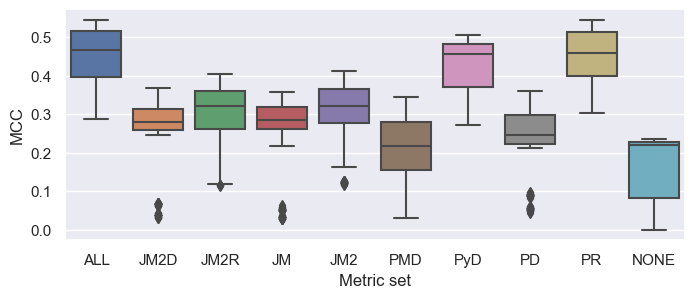

In [31]:
import seaborn as sns
sns.set(rc={'figure.figsize': (8.0, 3.0)})

metricset_data = results.filter(["real_mcc", "real_precision", "metric_set"])
metricset_data["metric_set"] = metricset_data["metric_set"].map(METRIC_SET_MAPPING)

mcc_set = sns.boxplot(
    metricset_data, y="real_mcc", x="metric_set"
)

mcc_set.set(xlabel="Metric set", ylabel="MCC")

mcc_set.get_figure().savefig("basic_mcc_set.png")
mcc_set

In [32]:
metricset_summary = metricset_data.groupby("metric_set").describe()

metricset_summary.style.to_latex("metrics-multiple.tex")

metricset_summary

real_mcc                                                    \
              count      mean       std       min       25%       50%   
metric_set                                                              
ALL           288.0  0.456368  0.069950  0.287957  0.395083  0.465320   
JM            288.0  0.255764  0.099971  0.027066  0.260125  0.284744   
JM2           288.0  0.304349  0.082041  0.117266  0.276722  0.321108   
JM2D          288.0  0.256891  0.097139  0.031640  0.259368  0.279810   
JM2R          288.0  0.299654  0.081192  0.113775  0.262200  0.320989   
NONE          144.0  0.162670  0.090208  0.000000  0.082933  0.219959   
PD            288.0  0.240202  0.087843  0.043745  0.222196  0.246366   
PMD           288.0  0.205841  0.096731  0.031406  0.154179  0.217217   
PR            273.0  0.451458  0.066411  0.302152  0.398732  0.458813   
PyD           288.0  0.423411  0.072648  0.272601  0.369134  0.454700   

                               real_precision                                \
                 75%       max          count      mean       std       min   
metric_set                                                                    
ALL         0.516547  0.543401          288.0  0.591814  0.079944  0.425683   
JM          0.318304  0.357351          288.0  0.392286  0.044414  0.298778   
JM2         0.365864  0.410716          288.0  0.408852  0.046683  0.308294   
JM2D        0.313984  0.367013          288.0  0.391527  0.044799  0.298925   
JM2R        0.359550  0.404064          288.0  0.408749  0.046834  0.307676   
NONE        0.226607  0.234937          144.0  0.433356  0.061243  0.298173   
PD          0.297250  0.359679          288.0  0.366960  0.034695  0.299660   
PMD         0.278784  0.343844          288.0  0.351026  0.035719  0.299036   
PR          0.513745  0.544677          273.0  0.599683  0.085728  0.416411   
PyD         0.483006  0.505819          288.0  0.626556  0.091975  0.417085   

                                                    
                 25%       50%       75%       max  
metric_set                                          
ALL         0.543764  0.623467  0.667030  0.686353  
JM          0.388653  0.406386  0.417957  0.449315  
JM2         0.403745  0.418042  0.440040  0.476784  
JM2D        0.383033  0.403009  0.420351  0.455389  
JM2R        0.403089  0.419141  0.438570  0.516936  
NONE        0.450240  0.457502  0.462224  0.486381  
PD          0.359484  0.366686  0.387872  0.418486  
PMD         0.324297  0.353019  0.377566  0.408790  
PR          0.504410  0.628784  0.675455  0.698620  
PyD         0.572771  0.667618  0.696978  0.731643

<AxesSubplot: xlabel='Metric set', ylabel='Precision'>

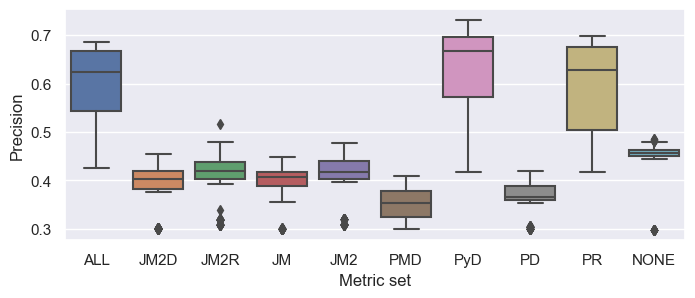

In [33]:
precision_set = sns.boxplot(
    metricset_data, y="real_precision", x="metric_set"
)


precision_set.set(xlabel="Metric set", ylabel="Precision")
precision_set.get_figure().savefig("basic_precision_set.png")
precision_set

<AxesSubplot: xlabel='ML model', ylabel='MCC'>

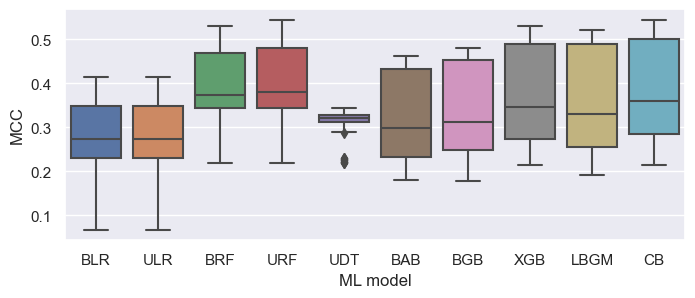

In [34]:

modeltype_data = results.filter(["real_mcc", "real_precision", "model_type"])
modeltype_data["model_type"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

model_mcc = sns.boxplot(
    modeltype_data, y="real_mcc", x="model_type"
)

model_mcc.set(xlabel="ML model", ylabel="MCC")
model_mcc.get_figure().savefig("basic_mcc_model.png")
model_mcc

<AxesSubplot: xlabel='ML model', ylabel='Precision'>

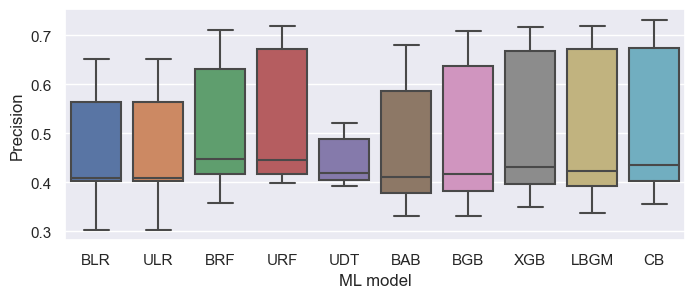

In [35]:
model_precision = sns.boxplot(
    modeltype_data, y="real_precision", x="model_type"
)

model_precision.set(xlabel="ML model", ylabel="Precision")
model_precision.get_figure().savefig("basic_precision_model.png")
model_precision

In [36]:
modelset_summary = modeltype_data.groupby("model_type").describe()

modelset_summary.style.to_latex("models-multiple.tex")

modelset_summary


real_mcc                                                    \
              count      mean       std       min       25%       50%   
model_type                                                              
BAB           228.0  0.315015  0.093287  0.179672  0.232403  0.299662   
BGB           228.0  0.327438  0.098776  0.178078  0.247687  0.311758   
BLR           228.0  0.273975  0.090530  0.067348  0.230764  0.273038   
BRF           221.0  0.392252  0.079446  0.218772  0.344608  0.372797   
CB            228.0  0.374637  0.108629  0.213584  0.284504  0.359562   
LBGM          228.0  0.350443  0.109022  0.191113  0.255446  0.329802   
UDT           228.0  0.315434  0.024170  0.218772  0.312623  0.320674   
ULR           228.0  0.273900  0.090523  0.067348  0.230700  0.272744   
URF           220.0  0.397048  0.083674  0.218772  0.343660  0.379912   
XGB           228.0  0.363239  0.106460  0.213428  0.272548  0.346090   

                               real_precision                                \
                 75%       max          count      mean       std       min   
model_type                                                                    
BAB         0.432623  0.463184          228.0  0.459672  0.110262  0.330767   
BGB         0.453924  0.480621          228.0  0.474717  0.125552  0.332094   
BLR         0.349651  0.415286          228.0  0.461274  0.100679  0.303130   
BRF         0.468622  0.531415          221.0  0.498136  0.106766  0.358191   
CB          0.500306  0.544677          228.0  0.499740  0.132632  0.355360   
LBGM        0.488437  0.520483          228.0  0.489552  0.135135  0.337106   
UDT         0.328132  0.344630          228.0  0.440534  0.041511  0.393316   
ULR         0.349651  0.414773          228.0  0.461174  0.100711  0.303130   
URF         0.480712  0.543000          220.0  0.506327  0.118879  0.397721   
XGB         0.490112  0.530769          228.0  0.492298  0.129969  0.348846   

                                                    
                 25%       50%       75%       max  
model_type                                          
BAB         0.379010  0.410587  0.586061  0.679800  
BGB         0.381892  0.416975  0.637783  0.708887  
BLR         0.402195  0.409646  0.564072  0.652231  
BRF         0.417826  0.447747  0.632082  0.710597  
CB          0.402919  0.435863  0.674115  0.731643  
LBGM        0.392586  0.423669  0.672496  0.718293  
UDT         0.405000  0.419488  0.488175  0.521835  
ULR         0.402190  0.409471  0.563554  0.652231  
URF         0.416785  0.444766  0.670979  0.718645  
XGB         0.397309  0.430169  0.666985  0.716055

<AxesSubplot: xlabel='Include smell models', ylabel='MCC'>

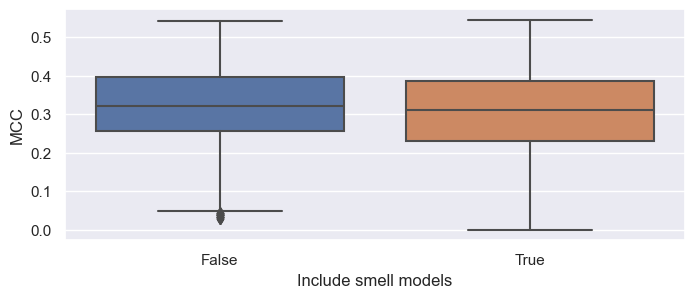

In [37]:
smell_data = results.filter(["real_mcc", "real_precision", "smell_models"])

smells_mcc = sns.boxplot(
    smell_data, y="real_mcc", x="smell_models"
)

smells_mcc.set(xlabel="Include smell models", ylabel="MCC")
smells_mcc.get_figure().savefig("basic_mcc_smells.png")
smells_mcc

<AxesSubplot: xlabel='Include smell models', ylabel='Precision'>

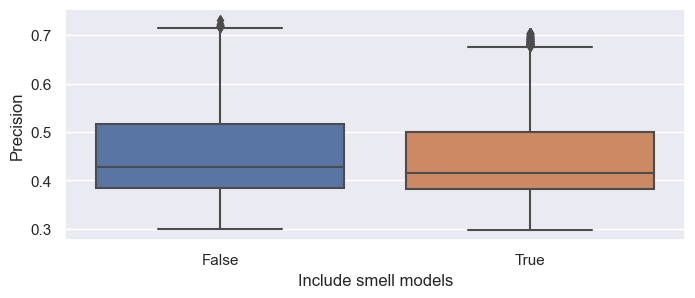

In [38]:
smells_precision = sns.boxplot(
    smell_data, y="real_precision", x="smell_models"
)

smells_precision.set(xlabel="Include smell models", ylabel="Precision")
smells_precision.get_figure().savefig("basic_precision_smells.png")
smells_precision

In [39]:
from effect_size_analysis.cliff_delta import cliff_delta


def calculate_cliff_deltas(all_results, column):
    descriptors = all_results[column].unique()
    cds = {}
    descriptors_1 = []
    descriptors_2 = []
    cd_mcc = []
    cd_mcc_min = []
    cd_mcc_max = []
    cd_prec = []
    cd_prec_min = []
    cd_prec_max = []

    descriptors_count = len(descriptors)
    for i in range(descriptors_count):
        item_1 = results[results[column] == descriptors[i]]
        for j in range(i + 1, descriptors_count):
            item_2 = results[results[column] == descriptors[j]]
            descriptors_1.append(descriptors[i])
            descriptors_2.append(descriptors[j])
            cd_mcc_curr = cliff_delta(item_1["real_mcc"], item_2["real_mcc"], alpha=0.05, accurate_ci=True)
            cd_mcc.append(cd_mcc_curr[0])
            cd_mcc_min.append(cd_mcc_curr[1][0])
            cd_mcc_max.append(cd_mcc_curr[1][1])
            cd_prec_curr = cliff_delta(item_1["real_precision"], item_2["real_precision"], alpha=0.05, accurate_ci=True)
            cd_prec.append(cd_prec_curr[0])
            cd_prec_min.append(cd_prec_curr[1][0])
            cd_prec_max.append(cd_prec_curr[1][1])
    return pd.DataFrame(
        {"descriptor_1": descriptors_1, "descriptor_2": descriptors_2, "CD MCC min": cd_mcc_min, "CD MCC": cd_mcc,
         "CD MCC max": cd_mcc_max, "CD precision min": cd_prec_min, "CD precision": cd_prec,
         "CD precision max": cd_prec_max})


In [40]:

calculate_cliff_deltas(results, "model_type")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,basic-linear-ridge,unscaled-linear,-0.104294,0.001231,0.106729,-0.099656,0.005925,0.111374
1,basic-linear-ridge,basic-randomforest,-0.699826,-0.624236,-0.534819,-0.402951,-0.303723,-0.197438
2,basic-linear-ridge,unscaled-randomforest,-0.712592,-0.639115,-0.551769,-0.423890,-0.325159,-0.218792
3,basic-linear-ridge,unscaled-decisiontree,-0.525021,-0.417821,-0.297570,-0.119241,-0.008041,0.103358
4,basic-linear-ridge,basic-adaboost,-0.277509,-0.173323,-0.065107,-0.038067,0.069444,0.175367
...,...,...,...,...,...,...,...,...
61,unscaled-LGBM,unscaled-catboost-02,0.470194,0.567829,0.651733,0.470236,0.567867,0.651767
62,unscaled-LGBM,unscaled-catboost-05,-0.294583,-0.193483,-0.088099,-0.220371,-0.116882,-0.010791
63,unscaled-catboost-01,unscaled-catboost-02,-0.404534,-0.306806,-0.202150,-0.407603,-0.309922,-0.205229
64,unscaled-catboost-01,unscaled-catboost-05,-0.670841,-0.590951,-0.497503,-0.791777,-0.733495,-0.661977


In [41]:

calculate_cliff_deltas(results, "metric_set")

L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:94: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 - ci_size) / denom_corretion,
L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:95: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 + ci_size) / denom_corretion,


,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,all-non-null-numeric,javametrics2-product,0.920168,0.947169,0.965203,0.955374,0.971523,0.981882
1,all-non-null-numeric,javametrics2-process,0.819128,0.868948,0.905756,0.903369,0.935089,0.956634
2,all-non-null-numeric,javametrics-numeric,0.909001,0.939429,0.959896,0.961914,0.976056,0.984987
3,all-non-null-numeric,javametrics2,0.791977,0.843340,0.882850,0.908947,0.939284,0.959727
4,all-non-null-numeric,pmd,0.937318,0.959057,0.973360,NaN,1.000000,NaN
5,all-non-null-numeric,pydriller,0.206297,0.299359,0.387053,-0.443249,-0.357157,-0.264535
6,all-non-null-numeric,product,0.936140,0.958261,0.972827,NaN,1.000000,NaN
7,all-non-null-numeric,process,-0.030066,0.066163,0.161176,-0.202797,-0.109229,-0.013683
8,all-non-null-numeric,none,NaN,1.000000,NaN,0.713029,0.859857,0.934436
9,javametrics2-product,javametrics2-process,-0.422371,-0.336492,-0.244626,-0.428348,-0.344136,-0.253997


In [42]:

calculate_cliff_deltas(results, "smell_models")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,False,True,0.017211,0.061019,0.104593,0.001078,0.044566,0.087886
